#Extract Charger Location Data from Open Street Map
Open Street Map (https://www.openstreetmap.org/about) is a open data source that provides map data.

This Python Notebook performs 2 functions
1. Using the ammenity=charging_station tag extracts a list of ev chargers from openstreetmap.  This list has location data aswell as other detailed information about charging locations.
2. Based on the id of a charging station (long/lat) another call is made to openstreetmap to extract all amentities within a radius (nominally 100m) of the charging location.

A number of Dataframe are created:
1. ev_charging_stations_df -> A list of all ev charging stations with id, long, lat, tags
2. ev_charging_stations_tags_df -> All tags are extracted as columns.  Over 100 attribute columns are available.

These dataframe's can be exported to CSV and then can be used for additional analysis and machine learning projects.

In [ ]:
pip install requests #Python Library for making HTTP Requests

In [ ]:
pip install cartopy #Python Package for drawing Maps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.8 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd

def get_ev_charging_stations():
    overpass_url = "https://overpass-api.de/api/interpreter"
    overpass_query = f"""
    [out:json];
    area["ISO3166-1"="AU"]->.a;
    (
      node["amenity"="charging_station"](area.a);
    );
    out center;
    """

    response = requests.get(overpass_url, params={'data': overpass_query})
    data = response.json()

    return data['elements']

def create_dataframe(elements):
    df_list = []
    for element in elements:
        df_list.append({
            'id': element['id'],
            'lat': element['lat'],
            'lon': element['lon'],
            'tags': element['tags']
        })
    return pd.concat([pd.DataFrame(df_list)])

if __name__ == "__main__":
    ev_charging_stations = get_ev_charging_stations()
    ev_charging_stations_df = create_dataframe(ev_charging_stations)
    print(f"Number of charging stations found in Australia:", len(ev_charging_stations_df))


Number of charging stations found in Australia: 840


In [ ]:
# Function to extract tags and create columns
def extract_tags(df, column_name):
    tags_df = pd.json_normalize(df[column_name])
    df = pd.concat([df.drop(columns=[column_name]), tags_df], axis=1)
    return df

# Call the function to extract tags and create columns
ev_charging_stations_tags_df = extract_tags(ev_charging_stations_df, 'tags')


In [ ]:
ev_charging_stations_df

,id,lat,lon,tags
0,1638722815,-31.936252,115.871531,"{'amenity': 'charging_station', 'opening_hours..."
1,3203111051,-32.034655,115.834855,"{'amenity': 'charging_station', 'brand': 'Char..."
2,3488644749,-32.935880,151.643848,"{'amenity': 'charging_station', 'brand': 'Char..."
3,3946796253,-41.218297,146.412523,"{'access': 'customers', 'amenity': 'charging_s..."
4,4016257448,-34.755480,149.720994,"{'addr:housenumber': '201', 'addr:street': 'Sl..."
...,...,...,...,...
835,11749067827,-20.001261,148.239091,"{'amenity': 'charging_station', 'brand': 'Tesl..."
836,11792059229,-35.027958,117.880632,"{'amenity': 'charging_station', 'brand': 'Tesl..."
837,11792059230,-35.028186,117.880749,"{'amenity': 'charging_station', 'brand': 'WA E..."
838,11800735919,-32.007739,115.893177,"{'amenity': 'charging_station', 'brand': 'Trit..."


In [ ]:
ev_charging_stations_tags_df

,id,lat,lon,amenity,opening_hours,brand,brand:wikidata,name,operator,operator:wikidata,...,payment:debit_cards,ele,payment:cards,payment:membership_card,payment:qr_code,not:operator:wikidata,socket:unknown,payment:apple_pay,man_made,socket:ccs:output
0,1638722815,-31.936252,115.871531,charging_station,24/7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3203111051,-32.034655,115.834855,charging_station,NaN,ChargePoint,Q5176149,ChargePoint,ChargePoint,Q5176149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3488644749,-32.935880,151.643848,charging_station,NaN,ChargePoint,Q5176149,NaN,ChargePoint,Q5176149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3946796253,-41.218297,146.412523,charging_station,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4016257448,-34.755480,149.720994,charging_station,24/7,Tesla Supercharger,Q17089620,Tesla Supercharger,"Tesla, Inc.",Q478214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,11749053754,-33.283593,149.095423,charging_station,NaN,Tesla Supercharger,Q17089620,Tesla Supercharger,"Tesla, Inc.",Q478214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,11749067827,-20.001261,148.239091,charging_station,NaN,Tesla Supercharger,Q17089620,Tesla Supercharger,"Tesla, Inc.",Q478214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,11792059229,-35.027958,117.880632,charging_station,NaN,Tesla Supercharger,Q17089620,Tesla Supercharger,"Tesla, Inc.",Q478214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,11792059230,-35.028186,117.880749,charging_station,NaN,WA EV Network,NaN,WA EV Network - Albany,Chargefox,Q105775824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


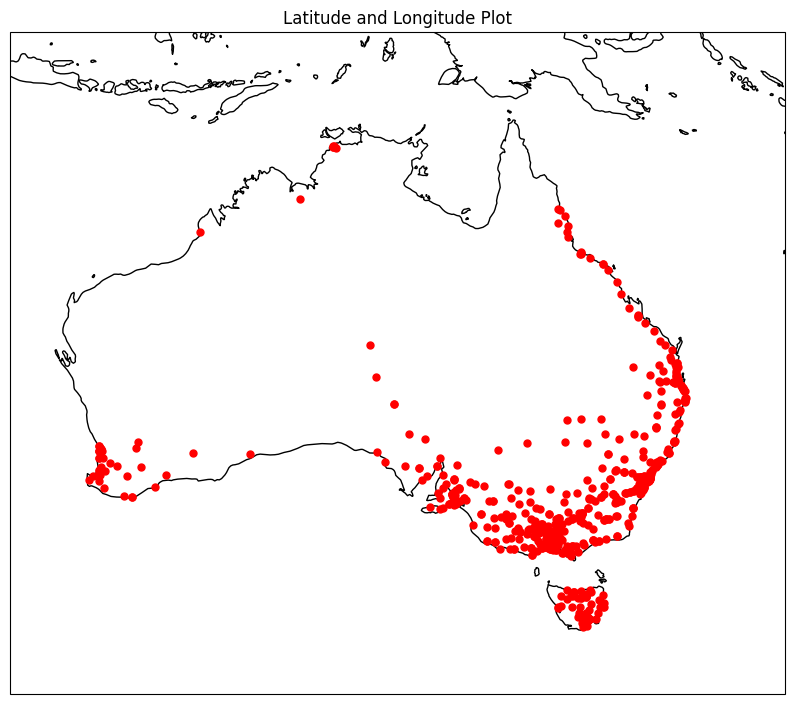

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

# Create a new map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent to Australia
ax.set_extent([110, 160, -45, -5])

# Plot latitudes and longitudes from the DataFrame
ax.plot(ev_charging_stations_df['lon'], ev_charging_stations_df['lat'], marker='o', color='red', markersize=5, linestyle='None', transform=ccrs.PlateCarree())

# Add coastlines and other map features
ax.coastlines()

# Set title and show plot
plt.title('Latitude and Longitude Plot')
plt.show()


In [ ]:
#A lot of Tags have a Null or no value recorded.  Print a table of all Tags ordered by the frequency that tags have a value
summary = ev_charging_stations_tags_df.describe(include='all')
summary = summary.T
summary = summary.sort_values(by=['count'], ascending=False)
summary.head(n=30)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,839.0,NaN,NaN,NaN,9236282162.243147,1886518271.255227,1638722815.0,7934358127.5,9610280317.0,10923355787.5,11800735919.0
lon,839.0,NaN,NaN,NaN,145.487526,7.726855,115.076035,144.729679,146.367319,150.8839,153.615842
amenity,839,1,charging_station,839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,839.0,NaN,NaN,NaN,-34.72294,4.730112,-43.431603,-37.812898,-35.002157,-33.622876,-12.374681
operator,637,77,Evie Networks,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
operator:wikidata,555,16,Q105795220,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capacity,375,15,2,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socket:type2_combo,282,6,1,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,264,31,Tesla Supercharger,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socket:chademo,252,5,1,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Create a function to create horizontal bar charts given a column name and the number of values to plot
import pandas as pd
import matplotlib.pyplot as plt

def plotbarh_category(df_name, column_name, nbars):
  df = df_name[[column_name]]

  # Count the frequency of each category
  category_counts = df[column_name].value_counts().head(nbars)
  category_counts = category_counts.sort_values(ascending=True)

  # Plotting
  plt.figure(figsize=(8, 6))
  category_counts.plot(kind='barh', color='skyblue')
  plt.title(column_name)
  plt.xlabel('Frequency')
  plt.ylabel(column_name)
  plt.xticks(rotation=0)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()


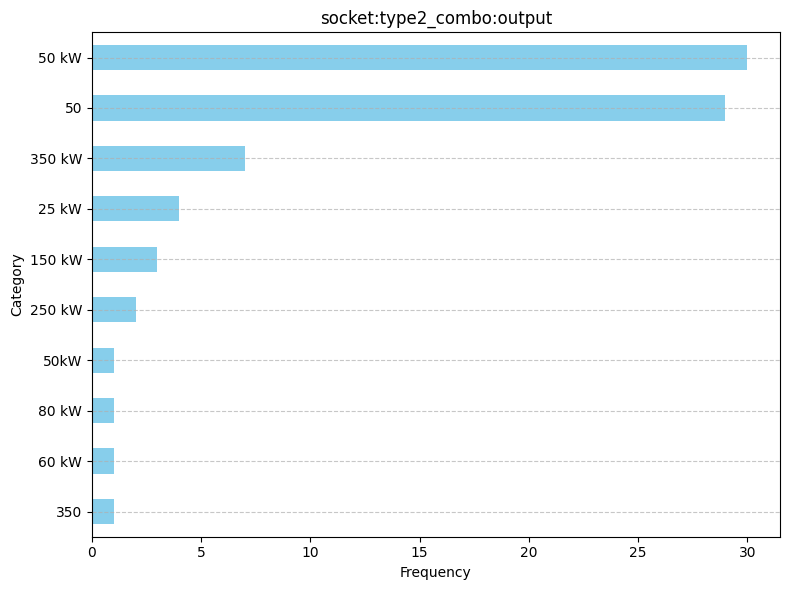

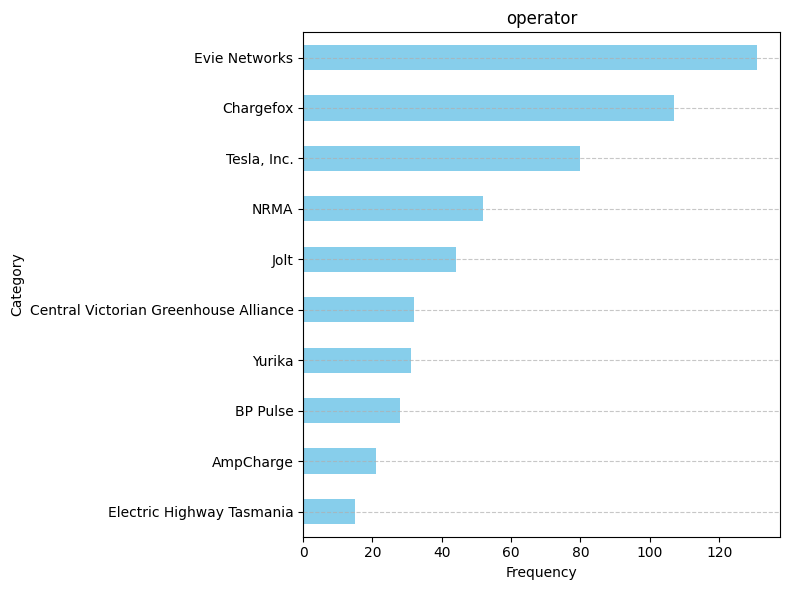

In [ ]:
plotbarh_category(ev_charging_stations_tags_df, 'socket:type2_combo:output', 10)
plotbarh_category(ev_charging_stations_tags_df, 'operator', 10)

In [ ]:
import requests
import pandas as pd

def get_nearby_locations(place_id, radius=100):
    overpass_url = "http://overpass-api.de/api/interpreter"
    query = f"""
    [out:json];
    (
      node({place_id});
    );
    (
      node(around:{radius})["name"];
    );
    out body;
    >;
    out skel qt;
    """
    response = requests.get(overpass_url, params={'data': query})
    data = response.json()
    nearby_locations = []
    for element in data['elements']:
        if 'tags' in element:
            location = {
                'charger id' : place_id,
                'id': element['id'],
                'lat': element['lat'],
                'lon': element['lon'],
                'amenity': element['tags'].get('amenity', ''),
                'tags': element['tags'],
                'name': element['tags'].get('name', ''),
                'shop type': element['tags'].get('shop', ''),
            }
            nearby_locations.append(location)
    return nearby_locations

In [ ]:
import pandas as pd

all_locations = []

# Loop through the first three rows of the DataFrame
for index, row in ev_charging_stations_df.iterrows():
  nearby_locations = get_nearby_locations(row['id'], 100)
  all_locations = all_locations + nearby_locations

all_locations_df = pd.DataFrame(all_locations)
all_locations_df

In [ ]:
all_locations_df

,charger id,id,lat,lon,amenity,tags,name,shop type
0,1638722815,2863454805,-31.935493,115.871281,,"{'name': 'adultshop.com', 'shop': 'erotic'}",adultshop.com,erotic
1,1638722815,8600878645,-31.935465,115.871371,restaurant,"{'addr:housenumber': '609', 'addr:postcode': '...",Meet & Bun,
2,1638722815,8600878646,-31.935388,115.871424,restaurant,"{'addr:housenumber': '609', 'addr:postcode': '...",Little B,
3,1638722815,8600878647,-31.935571,115.871199,restaurant,"{'addr:housenumber': '607', 'addr:postcode': '...",2 Fat Indians,
4,1638722815,9694280411,-31.935485,115.871034,cafe,"{'amenity': 'cafe', 'name': 'Viaje Coffee'}",Viaje Coffee,
...,...,...,...,...,...,...,...,...
4555,11800735919,5797730417,-32.007886,115.893203,taxi,"{'amenity': 'taxi', 'name': 'Taxi Stand 3 (T3)'}",Taxi Stand 3 (T3),
4556,11800735919,5864629468,-32.007079,115.892807,public_bookcase,"{'amenity': 'public_bookcase', 'description': ...",Pink Container Library,
4557,11800735919,5968332636,-32.007590,115.893200,drinking_water,"{'amenity': 'drinking_water', 'name': 'filtered'}",filtered,
4558,11800735919,5968332637,-32.008314,115.893405,drinking_water,"{'amenity': 'drinking_water', 'name': 'filtered'}",filtered,


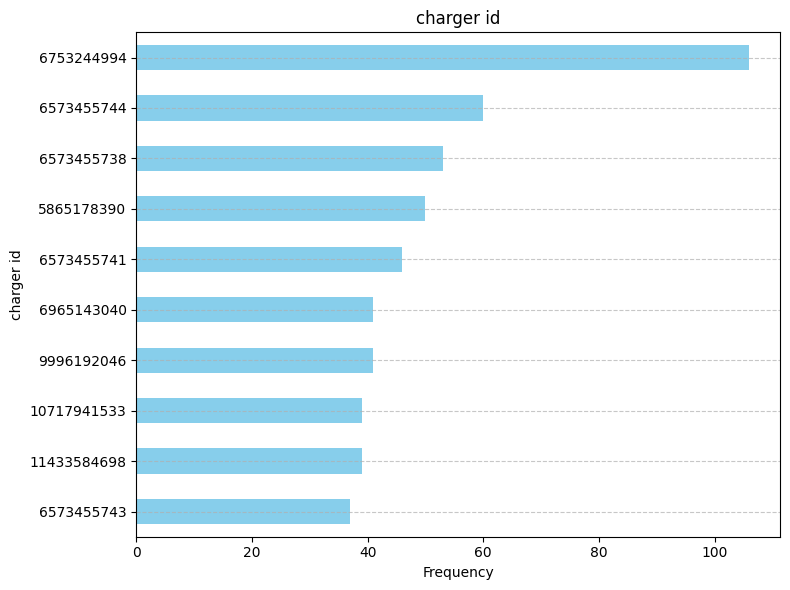

In [ ]:
plotbarh_category(all_locations_df, 'charger id', 10)

In [ ]:
from google.colab import files

# Export DataFrame to a CSV file
all_locations_df.to_csv('ev_charger_amenities.csv', index=False)
ev_charging_stations_df.to_csv('ev_charger_stations.csv', index=False)
ev_charging_stations_tags_df.to_csv('ev_charger_stations_tags.csv', index=False)

files.download('ev_charger_amenities.csv')
files.download('ev_charger_stations.csv')
files.download('ev_charger_stations_tags.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ev_charging_stations_df

,id,lat,lon,tags
0,1638722815,-31.936252,115.871531,"{'amenity': 'charging_station', 'opening_hours..."
1,3203111051,-32.034655,115.834855,"{'amenity': 'charging_station', 'brand': 'Char..."
2,3488644749,-32.935880,151.643848,"{'amenity': 'charging_station', 'brand': 'Char..."
3,3946796253,-41.218297,146.412523,"{'access': 'customers', 'amenity': 'charging_s..."
4,4016257448,-34.755480,149.720994,"{'addr:housenumber': '201', 'addr:street': 'Sl..."
...,...,...,...,...
835,11749067827,-20.001261,148.239091,"{'amenity': 'charging_station', 'brand': 'Tesl..."
836,11792059229,-35.027958,117.880632,"{'amenity': 'charging_station', 'brand': 'Tesl..."
837,11792059230,-35.028186,117.880749,"{'amenity': 'charging_station', 'brand': 'WA E..."
838,11800735919,-32.007739,115.893177,"{'amenity': 'charging_station', 'brand': 'Trit..."


In [ ]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(origin, destination):
    """
    Calculate the straight-line distance between two points on the Earth's surface using the Haversine formula.

    Args:
    - origin (tuple): Latitude and longitude of the origin point in degrees (e.g., (latitude, longitude)).
    - destination (tuple): Latitude and longitude of the destination point in degrees (e.g., (latitude, longitude)).

    Returns:
    - distance (float): Straight-line distance between the two points in kilometers.
    """
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1, lon1 = radians(origin[0]), radians(origin[1])
    lat2, lon2 = radians(destination[0]), radians(destination[1])

    # Calculate differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculate the distance
    distance = R * c

    return distance


In [ ]:
# Calculate distances and create DataFrame
distances_list = []
for i in range(len(ev_charging_stations_df)):
    for j in range(len(ev_charging_stations_df)):
        if i != j:
            origin = (ev_charging_stations_df['lat'][i], ev_charging_stations_df['lon'][i])
            destination = (ev_charging_stations_df['lat'][j], ev_charging_stations_df['lon'][j])
            distance = haversine_distance(origin, destination)
            distances_list.append({'origin': i, 'destination': j, 'distance': distance})

# Create DataFrame from distances list
distances_df = pd.DataFrame(distances_list)
distances_df

,origin,destination,distance
0,0,1,11.475660
1,0,2,3342.785501
2,0,3,2897.579710
3,0,4,3145.016249
4,0,5,2767.395561
...,...,...,...
704755,839,834,3110.087538
704756,839,835,3492.913112
704757,839,836,385.729146
704758,839,837,385.756437


In [ ]:
max_value = 500
min_value = 50

filtered_distance_df = distances_df[distances_df['distance'] <= max_value]
filtered_distance_df = filtered_distance_df[filtered_distance_df['distance'] >= min_value]
filtered_distance_df

,origin,destination,distance
63,0,64,182.244485
149,0,150,426.231883
153,0,154,196.441790
209,0,210,275.264536
220,0,221,150.265561
...,...,...,...
704579,839,658,54.542024
704660,839,739,245.759893
704721,839,800,356.614194
704757,839,836,385.729146


In [ ]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(origin, destination):
    """
    Calculate the straight-line distance between two points on the Earth's surface using the Haversine formula.

    Args:
    - origin (tuple): Latitude and longitude of the origin point in degrees (e.g., (latitude, longitude)).
    - destination (tuple): Latitude and longitude of the destination point in degrees (e.g., (latitude, longitude)).

    Returns:
    - distance (float): Straight-line distance between the two points in kilometers.
    """
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1, lon1 = radians(origin[0]), radians(origin[1])
    lat2, lon2 = radians(destination[0]), radians(destination[1])

    # Calculate differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculate the distance
    distance = R * c

    return distance

def calculate_distance_to_dataframe(location, dataframe, lat_col='lat', lon_col='lon', dist_col='distance'):
    """
    Calculate the distance between a single location and each location in a DataFrame of locations,
    and add a new column to the DataFrame to store these distances.

    Args:
    - location (tuple): Latitude and longitude of the single location (e.g., (latitude, longitude)).
    - dataframe (DataFrame): DataFrame containing the locations.
    - lat_col (str): Name of the column containing latitude values.
    - lon_col (str): Name of the column containing longitude values.
    - dist_col (str): Name of the column to store the distances.

    Returns:
    - dataframe (DataFrame): DataFrame with the added column for distances.
    """
    distances = []
    for _, row in dataframe.iterrows():
        destination = (row[lat_col], row[lon_col])
        distance = haversine_distance(location, destination)
        distances.append(distance)

    dataframe[dist_col] = distances
    return dataframe

In [ ]:
# Example usage
origin = (-33.865143, 151.209900)  #Sydney
destination = (-27.4705, 153.0260) #Brisbane

# Calculate distances and add to DataFrame
evcharger_matrix_df = calculate_distance_to_dataframe(origin, ev_charging_stations_df, dist_col='origin_distance')
evcharger_matrix_df = calculate_distance_to_dataframe(destination, evcharger_matrix_df, dist_col='dest_distance')

In [ ]:
max_value = 320
min_value = 50

filtered_distance_df = Origin_to_evcharger_df[Origin_to_evcharger_df['origin_distance'] <= max_value]
filtered_distance_df = filtered_distance_df[filtered_distance_df['origin_distance'] >= min_value]
filtered_distance_df['total_distance'] = filtered_distance_df['origin_distance'] + filtered_distance_df['dest_distance']
filtered_distance_df = filtered_distance_df.sort_values(by=['dest_distance'])

In [ ]:
filtered_distance_df

,id,lat,lon,tags,distance,origin_distance,dest_distance,total_distance
360,9255078725,-31.407190,152.900783,"{'amenity': 'charging_station', 'brand': 'Tesl...",199.253758,315.846897,437.907763,753.754660
58,6460587589,-31.436140,152.823675,"{'amenity': 'charging_station', 'brand': 'Tesl...",192.728783,309.466357,441.393594,750.859950
793,11433418128,-31.457391,152.827195,"{'amenity': 'charging_station', 'brand': 'Tesl...",190.862902,307.559508,443.739324,751.298832
202,7853821459,-31.458138,152.827418,"{'amenity': 'charging_station', 'authenticatio...",190.802351,307.497186,443.821349,751.318536
250,8390250930,-31.463792,152.822164,"{'amenity': 'charging_station', 'operator': 'C...",190.007196,306.705544,444.471773,751.177317
...,...,...,...,...,...,...,...,...
481,10026076729,-35.709157,150.172859,"{'amenity': 'charging_station', 'capacity': '2...",342.688119,225.854867,954.982834,1180.837701
106,6773252378,-35.002157,148.110405,"{'amenity': 'charging_station', 'authenticatio...",409.596583,311.087335,958.695456,1269.782791
7,4027667916,-35.002100,148.109860,"{'amenity': 'charging_station', 'brand': 'Tesl...",409.634654,311.130516,958.715208,1269.845724
603,10815538922,-35.416168,149.064300,"{'access': 'yes', 'amenity': 'charging_station...",372.825200,261.278060,959.874319,1221.152379
